# Analysis of Funding Received by Start-ups in India from 2018 to 2021

## 1. Business Understanding

### 1.1 Project Description
This data analysis project focuses on the funding received by start-ups in India from 2018 to 2021. The objective is to gain insights into the Indian start-up ecosystem and propose the best course of action for our team's venture. By analyzing the data on funding amounts, start-up details, and investor information, we aim to unearth prevailing patterns and gain insights about the opportunities in India's start-up ecosystem to inform decision-making.

### 1.2 The type of the problem
This project is of the exploratory data analytics and visualization type as it is our aim to deduce hidden insights and patterns from the available data.



## 2. Data understanding
The data used in this project was sampled from different start-up companies in India. It contains funding history for the period 2018 - 2021. The data was obtained from 4 datasets.

## 3. Data preparation
### 3.1 Installing and importing libraries

In [1]:
%pip install pyodbc  
%pip install python-dotenv 
%pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.



In [2]:
import pyodbc
from dotenv import dotenv_values 

# Analysis libraries
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer
import re
import datetime
from datetime import datetime
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Warning libraries
import warnings
warnings.filterwarnings('ignore')

c:\Users\ur\anaconda3\envs\learn-env\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### 3.2 Loading data

In [3]:
data2018 = pd.read_csv('data/startup_funding2018.csv')
data2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [4]:
data_2019 = pd.read_csv('data/startup_funding2019.csv')
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [5]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [6]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [7]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query = "Select * from dbo.LP1_startup_funding2020"
data2020 = pd.read_sql(query, connection)

In [8]:
data2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [9]:
query = "Select * from dbo.LP1_startup_funding2021"
data2021 = pd.read_sql(query, connection)

In [10]:
data2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


### To guide our analysis, we have formulated 5 SMART questions:
* What is the overall trend in funding received by start-ups in India from 2018 to 2021?
* Which industries or sectors have received the highest funding during this period?
* What is the distribution of startups across the cities in India?
* What is the average funding amount received by start-ups in India during this period?
* Is there a correlation between the funding amount and the number of investors involved in funding rounds?

###  We have also developed three hypotheses for testing:
Hypothesis 1:<br>
Null: The funding received by start-ups in India has not demonstrated consistent upward trajectory over the years.<br>
Alternate: The funding received by start-ups in India has demonstrated a consistent upward trajectory over the years.

Hypothesis 2: <br>
Null: There are no significant disparities in funding received by all sectors of the Indian startups. <br>
Alternate: The technology sectors receive higher funding compared to other industries.

Hypothesis 3: <br>
Null: Situating a startup in a particular city does not influence funding.<br>
Alternate: Situating a startup in a particular city significantly affects funding.

To test these hypotheses, we will conduct the following analyses: 
* For Hypothesis 1, we will analyze the year-by-year funding amounts and calculate the average growth rate of funding.
* To investigate Hypothesis 2, we will categorize start-ups based on industry and compare the funding amounts received by each sector.
* Regarding Hypothesis 3, we will examine the distribution of start-ups across cities and deduce which cities harbour most highly-funded start-ups.

## 3.2 Data Cleaning


### 3.2.1 2018 Data

First, the 2018 data will be inspected then cleaned.

In [11]:
#Overview of the first 5 rows 
data2018.head(10)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"₹16,000,000","Kalkaji, Delhi, India",Tripshelf is an online market place for holida...
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...
8,Freightwalla,"Information Services, Information Technology",Seed,—,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...


In [12]:
#Summary of the data
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


From the displayed summary:
* our data has no missing values
* All the columns are in string data type 

In [13]:
#defining a function that returns counts of unique values
def value(column):
    return data2018[column].value_counts()                         

In [14]:
value("Industry")

—                                                                      30
Financial Services                                                     15
Education                                                               8
Information Technology                                                  7
Finance, Financial Services                                             5
                                                                       ..
Battery, Electric Vehicle, Energy, Renewable Energy, Transportation     1
Dental, Elder Care, Health Care, Home Health Care, Personal Health      1
Advertising, Human Resources, Marketing                                 1
Automotive, E-Commerce, Information Services                            1
Mobile, Software, Travel                                                1
Name: Industry, Length: 405, dtype: int64

In [15]:
value("Round/Series")

Seed                                                                                                       280
Series A                                                                                                    73
Angel                                                                                                       37
Venture - Series Unknown                                                                                    37
Series B                                                                                                    20
Series C                                                                                                    16
Debt Financing                                                                                              13
Private Equity                                                                                              10
Corporate Round                                                                                              8
P

In [16]:
value("Location")

Bangalore, Karnataka, India         102
Mumbai, Maharashtra, India           94
Bengaluru, Karnataka, India          55
Gurgaon, Haryana, India              52
New Delhi, Delhi, India              51
Pune, Maharashtra, India             20
Chennai, Tamil Nadu, India           19
Hyderabad, Andhra Pradesh, India     18
Delhi, Delhi, India                  16
Noida, Uttar Pradesh, India          15
Haryana, Haryana, India              11
Jaipur, Rajasthan, India              9
Kolkata, West Bengal, India           6
Ahmedabad, Gujarat, India             6
Bangalore City, Karnataka, India      5
India, Asia                           4
Indore, Madhya Pradesh, India         4
Kormangala, Karnataka, India          3
Bhopal, Madhya Pradesh, India         2
Ghaziabad, Uttar Pradesh, India       2
Kochi, Kerala, India                  2
Thane, Maharashtra, India             2
Guindy, Tamil Nadu, India             1
Anand, Gujarat, India                 1
Chandigarh, Chandigarh, India         1


In [17]:
value("Amount")

—               148
1000000          24
500000           13
2000000          12
₹50,000,000       9
               ... 
22000000          1
70000             1
$28,500,000       1
₹342,000,000      1
35000000          1
Name: Amount, Length: 198, dtype: int64

#### Issues arising from the data:
* The Amount column is in string data type yet it contains numerical values.
* ```_``` characters in Amount and Industry columns which indicates the values are missing.
* Some amounts have characters such as ```₹```, ```,``` ,```$```
* Industry column contains many names for one industry.

 #### Dealing with duplicates

In [18]:
#checking for duplicates
data2018.duplicated().value_counts()

False    525
True       1
dtype: int64

Our 2018 data contains one duplicate which is marked by 'True' value.

In [19]:
#print out all the duplicates next to each other
data2018[data2018.duplicated(keep=False)]

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


In [20]:
#dropping all duplicates
data2018=data2018.drop_duplicates()

In [21]:
#RECHECK IF THERE ANY DUPLICATES LEFT
data2018.duplicated().value_counts()

False    525
dtype: int64

#### Data type conversion

The ```Amount``` column is categorised as a string data type yet amount should be in integer. This is brought about by several problems in this column:
* The ```,``` ,```$``` ,```₹``` characters which should be removed.
* Also there are ```_``` characters which indicate null values.
* Some currencies are Indian rupees while others US Dollars , so for standard currency the Indian rupee will be converted to US Dollar.
* Finally, the ```Amount``` column will be converted to numeric data type.

In [22]:
#Removing ',' from the Amount column
data2018['Amount'].replace(',','', regex=True, inplace=True)
data2018['Amount'].tail(10)

516    ₹1400000000
517      ₹10000000
518              —
519        6000000
520       14900000
521      225000000
522              —
523           7500
524      ₹35000000
525       35000000
Name: Amount, dtype: object

In [23]:
#Function to convert Indian rupee currency to dollars
def convert_to_dollars(value):

    if '₹' in str(value):
        # Remove the currency symbol
        amount = value.replace('₹', '')

       # Convert to dollars using the exchange rate for 2018
        return pd.to_numeric(amount, errors='coerce') * 0.146

    elif '$' in str(value):

        return value.replace('$', '')

    elif "—" in str(value):

        return None  #  a suitable value to represent missing/invalid data

    else:

        return value

#Displays the Amount column to 1 decimal place
pd.set_option('display.float_format', '{:.1f}'.format)

data2018 = data2018.applymap(convert_to_dollars)


    
        

In [24]:
#Converting the column to a numeric data type
data2018["Amount"]=data2018["Amount"].astype(float)
data2018["Amount"].dtype

dtype('float64')

In [25]:
data2018["Amount"].head(20)

0      250000.0
1     5840000.0
2     9490000.0
3     2000000.0
4           nan
5     1600000.0
6     2336000.0
7     7300000.0
8           nan
9           nan
10          nan
11          nan
12          nan
13          nan
14          nan
15   14600000.0
16     150000.0
17    1100000.0
18          nan
19      73000.0
Name: Amount, dtype: float64

#### Data Uniformity
For data uniformity across the 4 datasets which will later make merging easier, ```Location``` and ```Industry``` columns will only remain with the first word.

In [26]:
#maintianing first word before comma in the location column
data2018["Location"] = data2018["Location"].map(lambda x: x.split(',')[0])
data2018["Location"].tail(20)

506    Bangalore
507       Mumbai
508    New Delhi
509       Mumbai
510    Bengaluru
511       Mumbai
512       Jaipur
513       Mumbai
514    New Delhi
515         Pune
516    New Delhi
517    Bengaluru
518    Ghaziabad
519    Bangalore
520    Bengaluru
521    Bangalore
522      Haryana
523       Mumbai
524       Mumbai
525      Chennai
Name: Location, dtype: object

In [27]:
#maintianing first word before comma in the industry column
data2018["Industry"] = data2018["Industry"].map(lambda x: str(x).split(',')[0])
data2018["Industry"].head(20)

0             Brand Marketing
1                 Agriculture
2                      Credit
3          Financial Services
4        E-Commerce Platforms
5        Cloud Infrastructure
6                    Internet
7             Market Research
8        Information Services
9             Mobile Payments
10                        B2B
11                   Internet
12                       Apps
13              Food Delivery
14      Industrial Automation
15                 Automotive
16                    Finance
17                 Accounting
18    Artificial Intelligence
19         Internet of Things
Name: Industry, dtype: object

Earlier, it was noticed that the ```Industry``` column had '-' characters which indicate the values are missing. So the missing values are going to be replaced with ```Unknown ``` value given the column is a categorical data type.

In [28]:
#Replacing '_' with Unknown values
data2018["Industry"]=data2018["Industry"].replace('—', "Unknown", regex=True)
data2018["Industry"].head(20)

0             Brand Marketing
1                 Agriculture
2                      Credit
3          Financial Services
4        E-Commerce Platforms
5        Cloud Infrastructure
6                    Internet
7             Market Research
8        Information Services
9             Mobile Payments
10                        B2B
11                   Internet
12                       Apps
13              Food Delivery
14      Industrial Automation
15                 Automotive
16                    Finance
17                 Accounting
18    Artificial Intelligence
19         Internet of Things
Name: Industry, dtype: object

####  Handling Missing values

In [29]:
#Checking for missing values 
data2018.isnull().sum()

Company Name       0
Industry           0
Round/Series       0
Amount           148
Location           0
About Company      0
dtype: int64

In [30]:
#Computing summary of statistics for 2018 data
data2018.describe()

,Amount
count,377.0
mean,47244478.4
std,212692748.2
min,7500.0
25%,1000000.0
50%,3530000.0
75%,14965000.0
max,2920000000.0


The ```Amount``` column contains several missing values. Given the column is numerical, the best strategy would be to replace the missing values with the median  as it is less sensitive to outliers than the mean.

In [31]:
#Imputing missing values
array= data2018["Amount"].values.reshape(-1,1)
imputer=SimpleImputer(strategy="median")

data2018["Amount"]=imputer.fit_transform(array)

In [32]:
#Confirming there are no more missing values
data2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

Inorder to make merging and analysis after merging easier, a column named ```Year Funded ``` which contains the respective years for the dataset will be formed.

In [35]:
data2018['Year Funded'] = 2018
data2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,Year Funded
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,5840000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,9490000.0,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,3530000.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018


### 3.3.2 2019 Data

#### Data Exploration


The exploration techniques vary for numerical, categorical, or time-series variables. Currently, 

Here we typically:

- look at example records in the dataset
- investigate the datatypes of variables in the dataset
- calculate and investigate descriptive statistics (ex: central tendencies, variability etc.)

Common steps to check the health of the data:

- Check for missing data
- Check the skewness of the data, outlier detection
- etc...

Look at Example Records

In [36]:
 # display 10 random rows from the dataset 
data_2019.sample(10)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
58,Origo,2010.0,Gurugram,AgriTech,It provides post-harvest management services f...,"Mayank Dhanuka, Sunoor Kaul","Oikocredit, Caspian SME Impact Fund IV, Triod...","$6,800,000",NaN
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN
29,Bijak,2019.0,NaN,AgriTech,B2B platform for agricultural commodities.,"Nukul Upadhye, Mahesh Jakhotia, Jitender Bedwa...","Omnivore and Omidyar Network India, Sequoia Ca...","$2,500,000",Seed fund
70,Zebu,2015.0,NaN,Cybersecurity,Platform uses encryption technology to allow b...,Team of Waterloo-based software developers,Undisclosed,"$4,000,000",Seed round
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
26,Toffee Insurance,2017.0,Haryana,Insurance technology,Provides variety of insurance plans and policies,"Nishant Jain, Rohan Kumar",IVM Intersurer,"$5,500,000",Series A
82,Kratikal,nan,Uttar pradesh,Technology,Provides cyber security solutions,Pavan Kushwaha,"Gilda VC, Art Venture, Rajeev Chitrabhanu","$1,000,000",Pre-series A
5,FlytBase,nan,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,NaN
34,Rivigo,2014.0,NaN,Logistics,It offers delivery services across India to re...,"Deepak Garg, Gazal Kalra","SAIF Partners India VI Ltd, Spring Canter Inve...","$20,000,000",Series F
40,Trell,2016.0,Bangalore,Social Media,Blogging platform that enables people to creat...,"Pulkit Agrawal, Prashant Sachan, Arun Lodhi, B...","Ruizheng Investment, Tej Kapoor, Krinshavatara...","$2,000,000",Pre series A


#### Data-types, completeness Information

Using the Pandas "info" function, in addition to the data-type information for the dataset, we can look at counts of available records/missing records too.

In [37]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


From the summary above:
* All data types are string except the Founded column
* There are missing values in Founded, Headquarter, Sector, Founders, Stage columns


In [38]:
# check the columns 
data_2019.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

#### Data Cleaning 

Renaming columns

In [39]:
# define the new column names
new_columns = ['Company Name', 'Year Founded', 'Headquarter', 'Sector', 'Business Description', 'Founders', 'Investor', 'Funding Amount ($)', 'Funding Round']

# Rename the columns in the dataframe
data_2019 = data_2019.rename(columns=dict(zip(data_2019.columns, new_columns)))

In [40]:
data_2019.head()

,Company Name,Year Founded,Headquarter,Sector,Business Description,Founders,Investor,Funding Amount ($),Funding Round
0,Bombay Shaving,nan,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,nan,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


To reduce code repetition, a few fuctions were created to :
* Calculate descriptive statistics of a variable
* Plot the data distribution of a variable using a histogram
* Check for missing values in a variable


In [41]:
# Function to calculate descriptive statistics of a variable
def calculate_descriptive_stats(variable):
    return variable.describe()

# Function to plot the data distribution of a variable using a histogram
def plot_data_distribution(variable):
    plt.hist(variable)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()

# Function to check for missing values in a variable
def check_missing_values(variable):
    return variable.isnull().sum()

# detect outliers
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
  



#### Investigating missing Values

In [42]:
check_missing_values(data_2019)

Company Name             0
Year Founded            29
Headquarter             19
Sector                   5
Business Description     0
Founders                 3
Investor                 0
Funding Amount ($)       0
Funding Round           46
dtype: int64

#### Visualizing missing values

In [43]:
def plot_missing_values_heatmap(dataframe):
    # Creating a DataFrame indicating missing values
    missing_values = dataframe.isnull()
    # Plotting the missing values heatmap
    sns.heatmap(missing_values, cmap='viridis')
    # Setting plot properties
    plt.title('Missing Values Heatmap')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    # Display the plot
    plt.show()

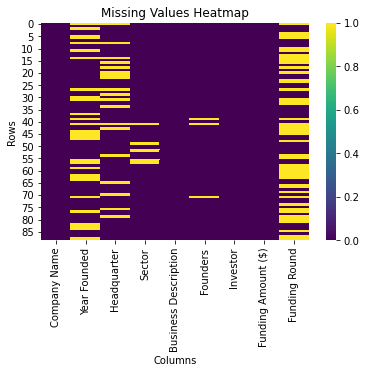

In [44]:
plot_missing_values_heatmap(data_2019)

#### Dealing with Duplicates

In [45]:
#checking for duplicates
data_2019.duplicated().value_counts()

False    89
dtype: int64

The data 2019 has no duplicates.

#### **Company Name Exploration**

The **company name** variable is a categorical variable. It represents the names of different companies in the dataset.


Data Cleaning Steps:
- Data Exploration and Descriptive Statistics
- Number of Company Names
- Remove leading, trailing spaces and Standardize case
- Handle missing values

Data Exploration and Descriptive Statistics

In [46]:
# Calculate the count of unique company names
unique_company_count = data_2019['Company Name'].nunique()
print("Count of Unique Company Names: {}".format(unique_company_count))

# Examine the most common company names
company_name_counts = data_2019['Company Name'].value_counts()
most_common_names = company_name_counts[company_name_counts == company_name_counts.max()]
print("\nMost Common Company Name(s):")
print(most_common_names)

Count of Unique Company Names: 87

Most Common Company Name(s):
Licious     2
Kratikal    2
Name: Company Name, dtype: int64


Remove leading, trailing spaces and Standardize case

In [47]:
# Remove leading and trailing spaces from the 'Company Name' column
data_2019['Company Name'] = data_2019['Company Name'].str.strip()

# standardize city name to lower case
data_2019['Company Name'] = data_2019['Company Name'].str.title()

Handle missing values

In [48]:
# Check missing values
check_missing_values(data_2019['Company Name'])

0

The ```Company Name``` column has no missing values.

#### **Year Founded Exploration**

**The "Year Founded"** variable is a quantitative variable representing the year in which each company was founded.
- Validate data format
- Handle missing values
- Identifying Outliers

Handle the missing values

In [49]:
# Check missing values
check_missing_values(data_2019['Year Founded'])

29

The column ```Year Founded``` contains 29 missing values which will handle by replacing them with the mode.

In [50]:
# Create an instance of the SimpleImputer with the median strategy
array = data_2019['Year Founded'].values.reshape(-1,1)
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the 'Year Founded' column and transform the column to impute missing values
data_2019['Year Founded'] = imputer.fit_transform(array)

Validate data format<br>
The column will be converted into an interger from the earlier float data type.

In [51]:
# Convert the 'Year Founded' column to integer
data_2019['Year Founded'] = data_2019['Year Founded'].astype(int)

In [52]:
data_2019['Year Founded'].head()

0    2015
1    2014
2    2015
3    2014
4    2004
Name: Year Founded, dtype: int32

#### **Headquarter Exploration**

**The "Headquater"** variable is a categorical variable representing the city in which each company is Located.
- Remove leading, trailing spaces and Standardize case
- Handle missing values
- Number of cities
- Examine the most common cities

Remove leading, trailing spaces and Standardize case

In [53]:
# Standardize case
data_2019['Headquarter'] = data_2019['Headquarter'].str.title()

# Remove leading and trailing spaces
data_2019['Headquarter'] = data_2019['Headquarter'].str.strip()

Handle the missing Values

In [54]:
# Check missing values
check_missing_values(data_2019['Headquarter'])

19

The columns contains 19 missing values which will replace with 'Unknown' .

In [55]:
# fill the null categorical values with 'Unknown'
data_2019['Headquarter'] = data_2019['Headquarter'].fillna('Unknown')

All Headquarter cities

In [56]:
# Calculate the count of unique cities
unique_city_count = data_2019['Headquarter'].nunique()
print("Count of Unique Cities: {}".format(unique_city_count))

Count of Unique Cities: 18


Examine the most common cities

In [57]:
# Examine the most common cities
city_counts = data_2019['Headquarter'].value_counts()
most_common_cities = city_counts[city_counts == city_counts.max()]
print("\nMost Common Cities:")
print(most_common_cities)


Most Common Cities:
Bangalore    21
Name: Headquarter, dtype: int64


#### **Explore Sector**

 INTRO

Data Cleaning Steps:
- Data Exploration and Descriptive Statistics
- Clean sector name
- Remove leading, trailing spaces and Standardize case
- Handle missing values

Data Exploration and Descriptive Statistics

In [58]:
# Calculate the count of unique sectors
unique_sector_count = data_2019['Sector'].nunique()
print("Count of Unique Sectors: {}".format(unique_sector_count))

# Examine the most common sectors
sector_counts = data_2019['Sector'].value_counts()
most_common_sectors = sector_counts[sector_counts == sector_counts.max()]
print("\nMost Common Sectors:")
print(most_common_sectors)

Count of Unique Sectors: 52

Most Common Sectors:
Edtech    7
Name: Sector, dtype: int64


Clean sector names

In [59]:
# cleaning sectory names
sector_replacements = {
    'AI & Tech': 'AI',
    'Ai': 'AI',
    'Automobile & Technology': 'Automobile',
    'Automotive tech': 'Automobile',
    'Automotive Tech': 'Automobile',
    'B2B Supply Chain': 'B2B',
    'E-commerce & AR': 'E-commerce',
    'E-commerce & Ar': 'E-commerce',
    'E-Commerce & Ar': 'E-commerce',
    'Ecommerce': 'E-commerce',
    'Food & Nutrition': 'Food',
    'Food & tech': 'Food',
    'Food & Tech': 'Food',
    'Food Tech': 'Food',
    'Foodtech': 'Food',
    'Games': 'Gaming',
    'Healthcare': 'Health',
    'Healthtech': 'Health',
    'Manufacturing': 'Industrial',
    'Marketing & Customer loyalty': 'Marketing',
    'Marketing & Customer Loyalty': 'Marketing',
    'Pharmaceutical': 'Pharma',
    'Robotics & AI': 'AI',
    'Robotics & Ai': 'AI',
    'SaaS': 'Software',
    'Safety tech': 'Security',
    'Social Media': 'SocialMedia',
    'Transport & Rentals': 'Transportation',
    'Virtual Banking': 'Banking',
    'Yoga & wellness': 'Wellness',
    'Hr Tech': "Human Resource",
    'Ai & Tech': 'AI',
}
data_2019['Sector'] = data_2019['Sector'].replace(sector_replacements)

Remove leading, trailing spaces and Standardize case

In [60]:
# Standardize case
data_2019['Sector'] = data_2019['Sector'].str.title()

# Remove leading and trailing spaces
data_2019['Sector'] = data_2019['Sector'].str.strip()

Handle missing values

In [61]:
# Check missing values
check_missing_values(data_2019['Sector'])

5

The column contains 5 missing values which will be replaced by 'Unknown' value

In [62]:
# Handle missing values
data_2019['Sector'] = data_2019['Sector'].fillna('Unknown')

#### **Explore Business Description**

The **Intro** variable is a categorical variable. It represents the names of different companies in the dataset.

- Text cleaning

Text cleaning

In [63]:
# Text cleaning
data_2019['Business Description'] = data_2019['Business Description'].str.replace('[^\w\s]', '')
data_2019['Business Description'] = data_2019['Business Description'].str.lower()

**Explore Founders**

The **Founders** variable is a categorical variable. It represents the founders of different companies in the dataset.


Data Cleaning Steps:
- Data Exploration and Descriptive Statistics
- Remove leading, trailing spaces and Standardize case
- Handle missing values

#### Data Exploration and Descriptive Statistics

In [64]:
# Calculate the count of unique founder names
unique_founders_count = data_2019['Founders'].nunique()
print("Count of Unique Founders: {}".format(unique_founders_count))

# Examine the most common Founderss
founders_name_counts = data_2019['Founders'].value_counts()
most_common_founders = founders_name_counts[founders_name_counts == founders_name_counts.max()]
print("\nMost Common Founders(s):")
print(most_common_founders)

Count of Unique Founders: 85

Most Common Founders(s):
Vivek Gupta, Abhay Hanjura    2
Name: Founders, dtype: int64


In some instances the ```Founders``` column contains two or more names therefore will split the names and only remain with first name.


In [65]:
# Cleaning founder names
data_2019['Founders'] = data_2019['Founders'].map(lambda x:str(x).split(',')[0])
data_2019['Founders']

0           Shantanu Deshpande
1     Adamas Belva Syah Devara
2                Jatin Solanki
3                Srikanth Iyer
4       Narayana Reddy Punyala
                ...           
84              Aaditya Sharda
85              Ritesh Agarwal
86                 Amit Bhasin
87                 Niraj Singh
88              Rajendra Setia
Name: Founders, Length: 89, dtype: object

#### Handle missing values


In [66]:
# Check missing values
check_missing_values(data_2019['Founders'])

0

The column contains 3 missing values which will handled by replacing them with 'Unknown' value.

In [67]:
# Replacing 'Unknown' with an empty string for single Founders
data_2019['Founders'] = data_2019['Founders'].replace('', 'Unknown')

# replace all the null values with 'Unknown'
data_2019['Founders'] = data_2019['Founders'].fillna('Unknown')

#### **Explore Investor**

The **explore** variable is a categorical variable. It represents the investors of different companies in the dataset.


Data Cleaning Steps:
- Data Exploration and Descriptive Statistics
- Remove leading, trailing spaces and Standardize case
- Detect duplicates
- Handle missing values

Data Exploration and Descriptive Statistics

In [68]:
# Calculate the count of unique Investor names
unique_investors_count = data_2019['Investor'].nunique()
print("Count of Unique Investors: {}".format(unique_investors_count))

# Examine the most common Investors
investors_name_counts = data_2019['Investor'].value_counts()
most_common_Investors = investors_name_counts[investors_name_counts == investors_name_counts.max()]
print("\nMost Common Investor(s):")
print(most_common_Investors)

Count of Unique Investors: 86

Most Common Investor(s):
Undisclosed    3
Name: Investor, dtype: int64


Remove leading, trailing spaces and Standardize case

In [69]:
# Cleaning Investor names
data_2019['Investor'] = data_2019['Investor'].str.strip()
data_2019['Investor'] = data_2019['Investor'].str.split(',')

# Formatting Investors
data_2019['Investor'] = data_2019['Investor'].apply(lambda x: ' & '.join([str(name).strip() for name in x]))

In [70]:
data_2019['Investor'].head(10)

0                                 Sixth Sense Ventures
1                                     General Atlantic
2     Deepak Parekh & Amitabh Bachchan & Piyush Pandey
3    Evolvence India Fund (EIF) & Pidilite Group & ...
4             Innovation in Food and Agriculture (IFA)
5                                          Undisclosed
6    Social Capital & AngelList India & Gemba Capit...
7         Gilda VC & Art Venture & Rajeev Chitrabhanu.
8                 Multiples Alternate Asset Management
9                                             SoftBank
Name: Investor, dtype: object

#### Handle missing values


In [71]:
# Check missing values
check_missing_values(data_2019['Investor'])

0

The column does not contain any missing values.

#### **Explore Funding Amount**

The **Funding Amount** variable is a numerical variable. It represents the funding amount of each company.

Data Cleaning Steps:
- Data Exploration and Descriptive Statistics
- Remove and replacing empty spaces, leading and trailing spaces
- Handle missing values
- Visualize the distribution
- Detecting and removing Outliers

In [72]:

data_2019['Funding Amount ($)']

0       $6,300,000
1     $150,000,000
2      $28,000,000
3      $30,000,000
4       $6,000,000
          ...     
84     $20,000,000
85    $693,000,000
86      $5,000,000
87     $50,000,000
88     $33,000,000
Name: Funding Amount ($), Length: 89, dtype: object

Data Exploration and Descriptive Statistics

In [73]:
# Data Exploration and Descriptive Statistics
print("Descriptive Statistics:")
print(data_2019['Funding Amount ($)'].describe())
print()

Descriptive Statistics:
count              89
unique             50
top       Undisclosed
freq               12
Name: Funding Amount ($), dtype: object



Remove and replacing empty spaces, leading and trailing spaces

In [74]:
# Remove the dollar sign
data_2019['Funding Amount ($)'] = data_2019['Funding Amount ($)'].str.replace('$','').replace(',', '', regex=True)

# Cleaning the Funding Amount ($)
data_2019['Funding Amount ($)'] = pd.to_numeric(data_2019['Funding Amount ($)'], errors='coerce')

Handle Undisclosed Values

In [75]:
# handling undisclosed
data_2019['Funding Amount ($)'] = data_2019['Funding Amount ($)'].replace('Undisclosed', np.nan)

In [76]:
# Create an instance of the SimpleImputer with the median strategy
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the 'Year Founded' column and transform the column to impute missing values
data_2019['Funding Amount ($)'] = imputer.fit_transform(data_2019[['Funding Amount ($)']])

#### Detecting and removing Outliers

In [77]:
data_2019['Funding Amount ($)'].describe()

count          89.0
mean     38297002.2
std     103599437.8
min        100000.0
25%       4000000.0
50%       6000000.0
75%      26000000.0
max     693000000.0
Name: Funding Amount ($), dtype: float64

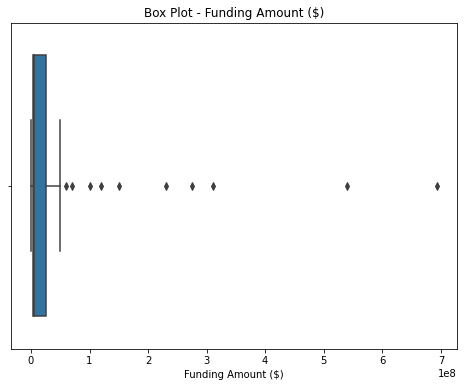

In [78]:
# Box Plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_2019['Funding Amount ($)'])
plt.title('Box Plot - Funding Amount ($)')
plt.xlabel('Funding Amount ($)')
plt.show()

#### Handle Outliers

In [79]:
# Detecting outliers:
outliers = detect_outliers(data_2019, 'Funding Amount ($)')
print("Number of Outliers: {}".format(len(outliers)))
print()

# removing outliers:
data_2019 = data_2019[~data_2019['Funding Amount ($)'].isin(outliers['Funding Amount ($)'])]

# Verify if outliers were handled
outliers_after_handling = detect_outliers(data_2019, 'Funding Amount ($)')
print("Number of Outliers after Handling: {}".format(len(outliers_after_handling)))

Number of Outliers: 10

Number of Outliers after Handling: 7


After handling the outliers

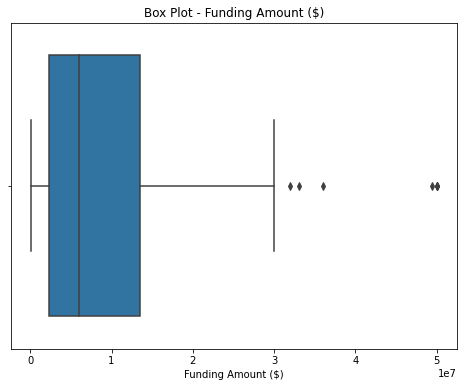

In [80]:
# Box Plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_2019['Funding Amount ($)'])
plt.title('Box Plot - Funding Amount ($)')
plt.xlabel('Funding Amount ($)')
plt.show()

In [81]:
# Detecting outliers:
outliers = detect_outliers(data_2019, 'Funding Amount ($)')
print("\nNumber of Outliers reduced to: {}".format(len(outliers)))
print()


Number of Outliers reduced to: 7



#### **Explore Funding Round**

Clean Funding Round names

In [82]:
data_2019["Funding Round"].value_counts()

Series A         10
Series B          8
Pre series A      8
Series C          2
Series D          2
Seed fund         1
Series E          1
Post series A     1
Seed funding      1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Fresh funding     1
Name: Funding Round, dtype: int64

In [83]:
#cleaning Funding round names
funding_round_replacement = {
    "Fresh funding" :"Seed",
    "Seed funding":"Seed",
    "Seed fund" :"Seed",
    "Pre series A": "Pre-series A",
    "Series B+" : "Series B",
    "Seed round" :"Seed"}
data_2019['Funding Round'] = data_2019['Funding Round'].replace(funding_round_replacement)

In [84]:
data_2019["Funding Round"].value_counts()

Series A         10
Series B          9
Pre-series A      9
Seed              4
Series C          2
Series D          2
Series E          1
Series F          1
Post series A     1
Name: Funding Round, dtype: int64

#### Handle missing values

In [85]:
# Check missing values
check_missing_values(data_2019['Funding Round'])

40

The column contains 46 missing values which will handle by filling them in with 'Unknown' value.

In [86]:
data_2019['Funding Round'] = data_2019['Funding Round'].fillna('Unknown')

Preview after Data cleaning

check for any missing values in the dataset



 No missing values found. Data cleaning is complete


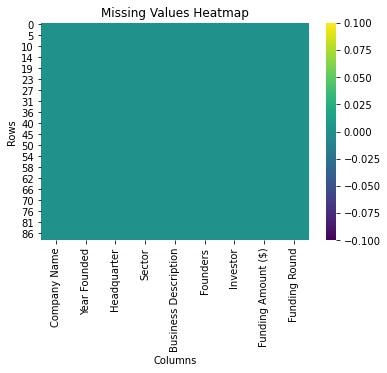

In [87]:
# check for any missing values
missing_values = data_2019.isnull().sum()
if missing_values.any():
    print("\n\nMissing values still exist in the dataset")
else:
    print("\n\n No missing values found. Data cleaning is complete")

# plot missing values
plot_missing_values_heatmap(data_2019)

#### Check for Duplicates

In [88]:
duplicates = data_2019.duplicated()
if duplicates.any():
    print("\n\nDuplicate records still exist in the dataset.")
else:
    print("\n\nNo duplicate records found. Data cleaning is complete.")




No duplicate records found. Data cleaning is complete.


In [89]:
#Creating a column named 'Year Funded'
data2021['Year Funded'] = 2019

#### 3.2.3  2020 Data

<h4>Data Exploration. The columns in the data are:</h4>
<div>
<li style="list-style: none;">
<ol>Company_Brand</ol>
<ol>Founded</ol>
<ol>HeadQuarter</ol>
<ol>Sector</ol>
<ol>What_it_does</ol>
<ol>Founders</ol>
<ol>Investor</ol>
<ol>Amount</ol>
<ol>Stage</ol>
<ol>column10</ol>
</li>
</div>


In [90]:
#display the columns in the dataframe
data2020.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

In [91]:
#shape of the data
data2020.shape

(1055, 10)

In [92]:
#display the summary of the data
data2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


From the summary above:
* All columns are string data type except ```Founded``` and ```Amount```
* All columns contain missing values except for ```Company Name``` and ```What_it_does```

In [93]:
#Overview of column 10
data2020['column10']

0       None
1       None
2       None
3       None
4       None
        ... 
1050    None
1051    None
1052    None
1053    None
1054    None
Name: column10, Length: 1055, dtype: object

In [94]:
#Overview of column 10
data2020['Founded']

0      2019.0
1      2019.0
2      2018.0
3      2020.0
4      2016.0
        ...  
1050      nan
1051      nan
1052   2012.0
1053   2015.0
1054   2017.0
Name: Founded, Length: 1055, dtype: float64

#### Dealing with duplicates

In [95]:
data2020.duplicated().value_counts()

False    1052
True        3
dtype: int64

The 2020 data contains 3 duplicates which will later drop

In [96]:
#print out all the duplicates next to each other
data2020[data2020.duplicated(keep=False)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
120,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",nan,None,None
129,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
145,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
205,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",nan,None,None
326,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None
362,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None


In [97]:
#Drop the duplicate
data2020=data2020.drop_duplicates()

In [98]:
#Confirming the duplicates are dealt with
data2020.duplicated().value_counts()

False    1052
dtype: int64



<h3>Decisions made:</h3>

* Change the ```Founded``` column to numerical data type.
* Drop ```column 10``` 
* Handle missing values









In [99]:
#drop the column named column 10
# Assuming data2020 is your DataFrame and 'column_name' is the column you want to drop
data2020=data2020.drop(['column10'],axis=1)
data2020.head()


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,nan,Pre-seed
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None


In [100]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1052 non-null   object 
 1   Founded        839 non-null    float64
 2   HeadQuarter    958 non-null    object 
 3   Sector         1039 non-null   object 
 4   What_it_does   1052 non-null   object 
 5   Founders       1040 non-null   object 
 6   Investor       1014 non-null   object 
 7   Amount         799 non-null    float64
 8   Stage          590 non-null    object 
dtypes: float64(2), object(7)
memory usage: 82.2+ KB


#### Handling missing values

In [101]:
#Checking missing values
data2020.isnull().sum()

Company_Brand      0
Founded          213
HeadQuarter       94
Sector            13
What_it_does       0
Founders          12
Investor          38
Amount           253
Stage            462
dtype: int64

In [102]:
#Imputing missing values in the Founded column using simple imputer method with most frequest value
array= data2020["Founded"].values.reshape(-1,1)
imputer=SimpleImputer(strategy="most_frequent")

data2020["Founded"]=imputer.fit_transform(array)



In [103]:
#Statistical summary for Amount column
data2020["Amount"].describe()

count           799.0
mean      112699397.5
std      2479695497.0
min           12700.0
25%         1000000.0
50%         3000000.0
75%        11000000.0
max     70000000000.0
Name: Amount, dtype: float64

For the ```Amount``` column the missing values will be replaced using the median since it is less sensitive to outliers than the mean.

In [104]:
#Imputing missing values in the amount column using simple imputer method
array= data2020["Amount"].values.reshape(-1,1)
imputer=SimpleImputer(strategy="median")

data2020["Amount"]=imputer.fit_transform(array)


In [105]:
#Confirming the missing values are dealt with for the Amount and Founded column
data2020.isnull().sum()

Company_Brand      0
Founded            0
HeadQuarter       94
Sector            13
What_it_does       0
Founders          12
Investor          38
Amount             0
Stage            462
dtype: int64

Given the other columns with missing values are catergorical, they will be replaced using "Undisclosed" value.

In [106]:
data2020=data2020.fillna("Undisclosed")
data2020.isnull().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64

#### Data uniformity
There some values in the ```Stage``` column which have different casing therefore all the values will be made consistent and uniform.


In [107]:
#Overview of the Stage column
data2020["Stage"].value_counts()

Undisclosed              462
Series A                  96
Seed                      79
Seed Round                69
Series B                  57
Pre series A              54
Pre-series A              53
Series C                  50
Series D                  22
Debt                      18
Pre Series A              12
Pre-seed                  11
Seed round                 9
Series E                   6
Bridge                     6
Angel Round                4
Series F                   4
Pre-series B               4
Pre seed round             4
Pre-Seed                   2
Pre-seed Round             2
Seed Funding               2
Seed funding               2
Pre-Series B               2
Pre-series C               2
Pre series B               2
Series B2                  2
Series H                   1
Seed A                     1
Mid series                 1
Pre series C               1
Pre-series                 1
Series E2                  1
Seed Round & Series A      1
Pre- series A 

In [108]:
#Handling the inconsistent values 
data2020.replace({"Stage": {"Seed Round" : "Seed",
                            "Pre series A": "Pre-series A",
                            "Pre Series A" : "Pre-series A" ,
                            "Seed round" :   "Seed",
                            "Pre seed round" :"Pre-seed",
                            "Series B2" :    "Series B",
                            "Pre series B" : "Pre-series B",
                            "Seed Funding" : "Seed",
                            "Pre-Series B" : "Pre-series B",
                            "Pre-Seed"  :    "Pre-seed",
                            "Seed funding" : "Seed",
                            "Pre-seed Round" :"Pre-seed",
                            "Series E2" :     "Series E",
                            "Pre series A1" : "Pre-series A",
                            "Series D1" :     "Series",
                            "Pre seed Round" :"Pre-seed",
                            "Pre series C"  : "Pre-Series C",
                            "Bridge Round" :  "Bridge",
                            "Series A-1" :    "Series",
                            "Pre- series A":  "Pre-series A",
                            "Seed Investment" :"Seed"}},inplace =True)

In [109]:
#Confirming data uniformity
data2020["Stage"].value_counts()

Undisclosed              462
Seed                     162
Pre-series A             121
Series A                  96
Series B                  59
Series C                  50
Series D                  22
Pre-seed                  20
Debt                      18
Pre-series B               8
Series E                   7
Bridge                     7
Series F                   4
Angel Round                4
Pre-series C               2
Series                     2
Edge                       1
Pre-series                 1
Series C, D                1
Pre-Series C               1
Seed A                     1
Series H                   1
Mid series                 1
Seed Round & Series A      1
Name: Stage, dtype: int64

In the ```HeadQuarter``` column,there were locations outside India yet our analysis focuses on India .Therefore , the locations will be named outside India.

In [110]:
data2020.loc[data2020['HeadQuarter'] == 'San Francisco, California, United States', 'HeadQuater'] = 'Outside India'

data2020.loc[data2020['HeadQuarter'] == 'London, England, United Kingdom', 'HeadQuater'] = 'Outside India'

data2020.loc[data2020['HeadQuarter'] == 'San Francisco Bay Area, Silicon Valley, West Coast', 'HeadQuater'] = 'Outside India'

data2020.loc[data2020['HeadQuarter'] == 'New York, United States', 'HeadQuater'] = 'Outside India'

data2020.loc[data2020['HeadQuarter'] == 'San Francisco, United States', 'HeadQuater'] = 'Outside India'

data2020.loc[data2020['HeadQuarter'] == 'Tirunelveli, Tamilnadu', 'HeadQuarter'] = 'Chennai'

data2020.loc[data2020['HeadQuarter'] == 'Tangerang, Jawa Barat, Indonesia', 'HeadQuater'] = 'Outside India'

data2020.loc[data2020['HeadQuarter'] == 'San Ramon, California ', 'HeadQuater'] = 'Outside India'

data2020.loc[data2020['HeadQuarter'] == 'Frisco, Texas, United States ', 'HeadQuater'] = 'Outside India'

data2020.loc[data2020['HeadQuarter'] == 'Paris, Ile-de-France, France', 'HeadQuater'] = 'Outside India'

data2020.loc[data2020['HeadQuarter'] == 'Plano, Texas, United States', 'HeadQuater'] = 'Outside India'

data2020.loc[data2020['HeadQuarter'] == 'Palmwoods, Queensland, Australia', 'HeadQuater'] = 'Outside India'

data2020.loc[data2020['HeadQuarter'] == 'France', 'HeadQuater'] = 'Outside India'

data2020.loc[data2020['HeadQuarter'] == 'San Ramon, California', 'HeadQuater'] = 'Outside India'

data2020.loc[data2020['HeadQuarter'] == 'San Francisco Bay Area, West Coast, Western US', 'HeadQuater'] = 'Outside India'

data2020.loc[data2020['HeadQuarter'] == 'Trivandrum, Kerala, India', 'HeadQuater'] = 'Trivandrum'

data2020.loc[data2020['HeadQuarter'] == 'Samastipur, Bihar', 'HeadQuater'] = 'Samastipur'

data2020.loc[data2020['HeadQuarter'] == 'Irvine, California, United States', 'HeadQuater'] = 'Outside India'

data2020.loc[data2020['HeadQuarter'] == 'Tumkur, Karnataka', 'HeadQuater'] = 'Tumkur'

data2020.loc[data2020['HeadQuarter'] == 'Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom', 'HeadQuater'] = 'Outside India'

data2020.loc[data2020['HeadQuarter'] == 'Shanghai, China', 'HeadQuater'] = 'Outside India'

data2020.loc[data2020['HeadQuarter'] == 'Jiaxing, Zhejiang, China', 'HeadQuater'] = 'Outside India'

data2020.loc[data2020['HeadQuarter'] == 'Sydney, New South Wales, Australia', 'HeadQuater'] = 'Outside India'

In [111]:
#Creating a column named 'year Funded'
data2021['Year Funded'] = 2020

#### 3.2.4 2021 Data

Inspect the data

In [112]:
data2021.head(10) # View first 10 rows of data2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2020
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2020
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2020
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2020
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2020
5,Urban Company,2014.0,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,"$188,000,000",None,2020
6,Comofi Medtech,2018.0,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI","$200,000",None,2020
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A,2020
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None,2020
9,Taikee,2010.0,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,"$1,000,000",None,2020


In [113]:
# Get summarised info about missing values and data types of the columns in data2021

data2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
 9   Year Funded    1209 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 94.6+ KB


From the displayed information about data2021,:

* *Founded*, *HeadQuarter*, *Founders*, *Investor*, *Amount* and *Stage* columns have some missing data
* All columns are of the object data type except *Founded* which is a float.

We take a critical look at all the data

In [114]:
pd.set_option('display.max_rows', None) # Set option for the full display of all rows


data2021.head(20)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2020
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2020
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2020
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2020
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2020
5,Urban Company,2014.0,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,"$188,000,000",None,2020
6,Comofi Medtech,2018.0,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI","$200,000",None,2020
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A,2020
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None,2020
9,Taikee,2010.0,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,"$1,000,000",None,2020


### Issues arising from data2021:

* Founded column is a float. It has to be a date

* Some Amounts have $undisclosed, Undisclosed and undisclosed. We may treat them as missing values

* The Amounts and Stage for FanPlay company at index 98 are interchanged

* At index 242, 256, 257, and 545, the amount appears at the investor’s column and then stage at the amount column

* Little Leap at   at index 538 has Ah! Ventures(investors) instead of amount and then amount at stage column. Also, ‘Holistic Development Programs for children in …; should be   replaced with Vishal Gupta as founder.

* BHyve company index 551 has part of ‘what_it_does’ at founders cl then founders at investor cl and investors at amount col ……. It also had investor’s name as ITO Angel Network instead of JITO Angel Network

* Some amounts are separated by ‘,’ some too have ‘$$’ preceding them and some only ‘$’ as amount…this is for EventBeep, MPL

* Amount for Godamwale at index 1148 is misspelt as 1000000\t#REF! instead of 1000000 and is at investor col with stage rather taking its place. Also, the investor is **Capt. Anand Aryamane**

* for index 1100-Sochcast company, Heaquarter is replaced with ‘Online Media\t#REF!’ and sector
* There are some duplicates

#### Resolution

* Delete duplicates
* Update misplaced values for the specifi rows and columns
* Impute with right values from credible sources where such values are mispelt or omitted
* Convert columns to right data types
* Standardise the 'Stage' column for good analysis by renaming or grouping

#### Delete Duplicates

In [115]:
# Confirm duplicated records

data2021.duplicated().sum()

19

Let's take a look, first.

In [116]:
data2021[data2021.duplicated()].head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None,2020
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None,2020
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2020
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None,2020
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None,2020


Delete them

In [117]:
# Delete the duplicates and set the index

data2021 = data2021.drop_duplicates().reset_index(drop=True)

In [118]:
# Check if duplicates were dropped

data2021.shape

(1190, 10)

Swap values interchanged

In [119]:
# A function to swap vulues un specif columns

def swap_values(df, row_index, column1, column2):
    """
    Swaps the values of two specific columns in a DataFrame for a given row index.

    Args:
        df (pd.DataFrame): The DataFrame to be modified.
        row_index: The index of the row where the values will be swapped.
        column1 (str): The name of the first column.
        column2 (str): The name of the second column.

    Returns:
        pd.DataFrame: The DataFrame with the swapped values.
    """
    df_modified = df.copy()
    value1 = df_modified.at[row_index, column1]
    value2 = df_modified.at[row_index, column2]
    df_modified.at[row_index, column1] = value2
    df_modified.at[row_index, column2] = value1
    return df_modified


In [120]:
# Apply function to swap Amount and Stage cols

data2021 = swap_values(data2021, 98 , 'Amount', 'Stage')
data2021 = swap_values(data2021, 655 , 'Amount', 'Stage')

#### Update misplaced values

We now update values wrongly placed or mispelt

In [121]:
# A function to update values in specific columns and rows

def update_values(df, row_index, column_values):
    """
    Updates multiple values in a DataFrame for a specific row.

    Args:
        df (pd.DataFrame): The DataFrame to be modified.
        row_index: The index of the row where the values will be updated.
        column_values (dict): Dictionary where keys are column names and values are the new values.

    Returns:
        pd.DataFrame: The DataFrame with the updated values.
    """
    df_modified = df.copy()
    for column, value in column_values.items():
        df_modified.at[row_index, column] = value
    return df_modified



In [122]:
# Apply function to specific rows and columns

data2021 = update_values(data2021, 237, column_values={'Investor': 'Unknown', 'Amount': '$22000000', 'Stage': 'Series C'})

data2021 = update_values(data2021, 238, column_values={'HeadQuarter':'Gurugram', 'Investor': 'Unknown', 'Amount': '$5000000', 'Stage': 'Seed'})

data2021 = update_values(data2021, 526, column_values={'Investor': 'Unknown', 'Amount': '$1000000', 'Stage': 'Pre-series A'})

data2021 = update_values(data2021, 532, column_values={'Founders': 'Omkar Pandharkame, Ketaki Ogale' ,'Investor': 'JITO Angel Network, LetsVenture', 'Amount': '$300000', 'Stage': 'Venture-Series Unknown'})

data2021 = update_values(data2021, 658, column_values={'Founders': 'Sushil Agarwal' ,'Investor': 'JITO Angel Network, LetsVenture', 'Amount': '$1000000', 'Stage': 'Venture-Series Unknown'})

# data2021 = update_values(data2021, 1100, column_values={'HeadQuarter': 'Bangalore' ,'Investor': ' VINNERS, Raj Nayak, Viacom18 Media, Amritaanshu Agrawal, Mirabaud', 'Amount': '$Undisclosed', 'Stage': 'Venture-Series Unknown'})

data2021 = update_values(data2021, 519, column_values={'Founders': 'Vishal Gupta' ,'Investor': 'ah! Ventures', 'Amount': '$300000', 'Stage': 'Venture-Series Unknown'})

data2021 = update_values(data2021, 1148, column_values={ 'Investor': 'Capt. Anand Aryamane', 'Amount': '$1000000', 'Stage': 'Seed'})


data2021 = update_values(data2021, 1129, column_values={ 'Investor': 'Capt. Anand Aryamane', 'Amount': '$1000000', 'Stage': 'Seed'})

In [123]:
# Check just by one example

data2021.iloc[[1148]]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
1148,Coutloot,2016.0,Mumbai,Consumer Services,Empowering local markets to sell online social...,"Mahima Kaul, Jasmeet Thind",Capt. Anand Aryamane,$1000000,Seed,2020


#### Company_Brand column

In [124]:
# Get unique values with their frequencies of the comapany_brand column

data2021['Company_Brand'].value_counts()


BharatPe                           8
BYJU'S                             4
MPL                                3
Ola Electric                       3
OYO                                3
Spinny                             3
Bizongo                            3
Siply                              3
MediBuddy                          3
Jumbotail                          3
Captain Fresh                      3
Northern Arc                       3
Slice                              3
KreditBee                          3
Karbon Card                        3
Delhivery                          3
DealShare                          3
Zetwerk                            3
CoinSwitch Kuber                   3
Teachmint                          3
Ruptok                             2
Pine Labs                          2
Kirana247                          2
Groww                              2
PumPumPum                          2
Comofi Medtech                     2
Leap Finance                       2
L

Same company name was treated as separate identities: BYJU’S and  BYJU'S. <br>This might be due to the different apostrophies used.

........let's check!

In [125]:
# Check if they are same

"BYJU'S" ==  'BYJU’S'


False

In [126]:
# Good! Now we correct that and that's all for company_Brand

data2021['Company_Brand'] = data2021['Company_Brand'].str.replace("’", "'")

In [127]:
data2021['Company_Brand'].nunique() #Checking...

1032

In [132]:
# Get summary info, number of unique values and the values of the 'HeadQuarter' column

print(f"{data2021.info()}\n")
print(f"{data2021['HeadQuarter'].nunique()}\n")
print(f"{data2021['HeadQuarter'].value_counts()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1190 non-null   object 
 1   Founded        1189 non-null   float64
 2   HeadQuarter    1189 non-null   object 
 3   Sector         1190 non-null   object 
 4   What_it_does   1190 non-null   object 
 5   Founders       1186 non-null   object 
 6   Investor       1129 non-null   object 
 7   Amount         1188 non-null   object 
 8   Stage          772 non-null    object 
 9   Year Funded    1190 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 93.1+ KB
None

69

Bangalore                            421
Mumbai                               198
Gurugram                             155
New Delhi                            142
Pune                                  46
Chennai                               40
Noida                                 34
Hyder

There sure have been wrong placement for 'Information Technology & Services' and  'Food & Beverages' <br>
Let's check that out!

In [133]:
# Checking .....

data2021[data2021['HeadQuarter'] == 'Food & Beverages']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
236,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed,2020


In [134]:
# Placing them correctly for MasterChow using the update_value function

data2021 = update_values(data2021, 236, column_values={'HeadQuarter': 'New Delhi', 'Sector': 'Food & Beverages'})

In [135]:
# Checking .....

data2021[data2021['HeadQuarter'] == 'Food & Beverages']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded


In [136]:
# Checking for Peak

data2021[data2021['HeadQuarter'] == 'Information Technology & Services']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
1157,Peak,2014.0,Information Technology & Services,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,$75000000,Series C,2020


In [137]:
# Placing them correctly

data2021 = update_values(data2021, 1157, column_values={ 'HeadQuarter': 'Manchestor', 'Sector': 'Information Technology & Services'})

In [138]:
# Checking ......

data2021[data2021['HeadQuarter'] == 'Information Technology & Services']


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded


Deal with Missing Values

In [139]:
# Check for missing values

data2021[data2021['HeadQuarter'].isnull()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
29,Vidyakul,2018.0,None,EdTech,Vidyakul is an vernacular e-learning platform ...,"Raman Garg, Tarun Saini","JITO Angel Network, SOSV","$500,000",Seed,2020


In [140]:
# Fill the missing value with its correct value 'Gurgaon'ArithmeticError
data2021 = update_values(data2021, 29, column_values={'HeadQuarter': 'Gurgaon'})

#### Dealing with the 'Founded' Col

In [141]:
# Getting the unique values of the 'Founded' column

data2021['Founded'].unique()

array([2019., 2015., 2012., 2021., 2014., 2018., 2016., 2020., 2010.,
       2017., 1993., 2008., 2013., 1999., 1989., 2011.,   nan, 2009.,
       2002., 1994., 2006., 2000., 2007., 1978., 2003., 1998., 1991.,
       1984., 2004., 2005., 1963.])

In [142]:
# Checking the number of missing values

data2021['Founded'].isnull().sum()

1

In [143]:
# Get statistical summaries of the column to inform 
# what strategy to use for imputation

data2021['Founded'].describe()

count   1189.0
mean    2016.6
std        4.5
min     1963.0
25%     2015.0
50%     2018.0
75%     2020.0
max     2021.0
Name: Founded, dtype: float64

In [144]:
# Check data type 


data2021['Founded'].dtype

dtype('float64')

Now, we can do imputation. <br> Since 'year' is a categorical data here, we use the most frequent to fill the null.

In [145]:
# Imputing missing values

array = data2021['Founded'].values.reshape(-1,1)
imputer = SimpleImputer(strategy='most_frequent')

data2021['Founded'] = imputer.fit_transform(array)

In [146]:
data2021['Founded'].unique()

array([2019., 2015., 2012., 2021., 2014., 2018., 2016., 2020., 2010.,
       2017., 1993., 2008., 2013., 1999., 1989., 2011., 2009., 2002.,
       1994., 2006., 2000., 2007., 1978., 2003., 1998., 1991., 1984.,
       2004., 2005., 1963.])

Converting 'Founded' from float to int64

In [147]:
# Founded column converted to int

data2021['Founded'] = data2021['Founded'].astype(int)
data2021['Founded'].head()

0    2019
1    2015
2    2012
3    2015
4    2021
Name: Founded, dtype: int32

In [148]:
# Making sure the conversion was done

data2021['Founded'].dtype

dtype('int32')

In [149]:
# Get unique values

data2021['Founded'].unique()

array([2019, 2015, 2012, 2021, 2014, 2018, 2016, 2020, 2010, 2017, 1993,
       2008, 2013, 1999, 1989, 2011, 2009, 2002, 1994, 2006, 2000, 2007,
       1978, 2003, 1998, 1991, 1984, 2004, 2005, 1963])

#### Cleaning the 'Amount' col

In [150]:
# Inspecting unique values with their frequencies

data2021['Amount'].value_counts()

$Undisclosed        72
$1000000            54
Undisclosed         43
$2000000            40
$1,000,000          33
$3000000            31
$5000000            30
$10000000           28
$500000             24
$undisclosed        22
$2,000,000          20
$4000000            20
$200000             19
$300000             19
$400000             18
$200,000            17
$3,000,000          17
$20000000           15
$10,000,000         15
$6000000            14
$1200000            13
$30000000           13
$7000000            13
$5,000,000          12
$500,000            11
$15,000,000         11
$100000000          11
$700000             11
$6,000,000          10
$50000000           10
$300,000            10
$600000             10
$4,000,000          10
$1500000            10
$12000000            9
$1,500,000           9
$40000000            8
$100000              8
$30,000,000          8
$2500000             8
$8000000             7
$3500000             7
$4500000             6
$25000000  

Replacing Undisclosed/$undisclosed/$Undisclosed values under the 'Amounts' Column

In [151]:
# Function to replace anomalous amount values with np.nan

def replace_values_with_nan(df, column_name, values_to_replace):
    """
    Replaces specified values in a column of a DataFrame with np.nan.

    Args:
        df (pandas.DataFrame): The DataFrame containing the column to modify.
        column_name (str): The name of the column to replace values in.
        values_to_replace (list or scalar): The value(s) to replace with np.nan. Can be a single value or a list of values.

    Returns:
        pandas.DataFrame: A modified DataFrame with the specified values replaced by np.nan.

    Example:
        # Create a sample DataFrame
        data = {
            'Column1': [1, 2, 3, 4, 5],
            'Column2': ['A', 'B', 'C', 'D', 'E'],
            'Column3': ['X', 'Y', 'Z', 'X', 'Z']
        }

        df = pd.DataFrame(data)

        # Define the column name and values to replace with np.nan
        column_name = 'Column3'
        values_to_replace = ['X', 'Z']

        # Call the replace_values_with_nan function
        df_modified = replace_values_with_nan(df, column_name, values_to_replace)

        # Print the modified DataFrame
        print(df_modified)
    """
    df[column_name] = df[column_name].replace(values_to_replace, np.nan)
    return df


In [152]:
# Invoking the function to replace the missing values with np.nan

data2021 = replace_values_with_nan(data2021, 'Amount', ['$Undisclosed', '$undisclosed', 'undisclosed', 'Undisclosed', 'None'])

# Replacing the undesired characters

data2021['Amount'] = data2021['Amount'].str.replace('[$,]', '')

In [153]:
# Converting the 'Amount' col to float

data2021['Amount'] = pd.to_numeric(data2021['Amount'])

In [154]:
# Checking....

data2021['Amount'].dtype

dtype('float64')

In [155]:
# Make scientific numbers display as normal with i decimal point

pd.set_option('display.float_format', '{:.1f}'.format)


In [156]:
# Get statistical summary of data2021

data2021.describe()

,Founded,Amount,Year Funded
count,1190.0,1049.0,1190.0
mean,2016.6,171212131.6,2020.0
std,4.5,4631144962.5,0.0
min,1963.0,10000.0,2020.0
25%,2015.0,1000000.0,2020.0
50%,2018.0,3500000.0,2020.0
75%,2020.0,15000000.0,2020.0
max,2021.0,150000000000.0,2020.0


Filling missing values in the 'Amount' Col

In [157]:
# Imputing missing values

array = data2021['Amount'].values.reshape(-1,1) # simpleImputer takes 2d array as input
imputer = SimpleImputer(strategy='median')   # Chose 'median' strategy because of the presence of outliers

data2021['Amount'] = imputer.fit_transform(array)

In [158]:
# View first 5 rows of data2021

data2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2020
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None,2020
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2020
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2020
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2020


Get Outliers and Remove them

In [159]:
def get_outlier(data, column):
    """
    Function that identifies outliers from the dataframe

    Args:
        data : pandas dataframe
            Contains the data where the outliers are to be found
        column : str
            Usually a string with the name of the column
    
    Returns:
        None: prints number of outliers 
    """
    
    # calculate interquartile range
    q25, q75 = np.percentile(data2021['Amount'], 25), np.percentile(data2021['Amount'], 75)
    iqr = q75 - q25
    print('Percentiles: 25th = %.3f, 75th = %.3f, IQR = %.3f' % (q25, q75, iqr))
    
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    # identify outliers
    indx = np.where((data2021['Amount'] < lower) | (data2021['Amount'] > upper))
    print('Identified outliers: %d' % len(indx[0]))
    
  

In [160]:
# Call the function remove_outlier()

get_outlier(data2021, 'Amount')

Percentiles: 25th = 1000000.000, 75th = 11000000.000, IQR = 10000000.000
Identified outliers: 203


Since outliers are 203 representing almost 10% of our data, we choose to ignore them.

#### Cleaning the *'Stage'* Column

Inspecting the unique values in the 'Stage' Column

In [161]:
data2021['Stage'].unique() # Get unique values of Stage column

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Upsparks', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Venture-Series Unknown', 'Early seed',
       'Series D1', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

Check how many records have the null value at the 'Stage' column

In [162]:
data2021['Stage'].isnull().sum()  # Get the numer of missing values in Stage

418

Oops! Pretty much! Let's take a deeper look at those records.

In [163]:
data2021[data2021['Stage'].isnull()].head() # View first 5 rows whose stage column are null

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None,2020
5,Urban Company,2014,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,188000000.0,None,2020
6,Comofi Medtech,2018,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI",200000.0,None,2020
8,Vitra.ai,2020,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,3500000.0,None,2020
9,Taikee,2010,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,1000000.0,None,2020


Alright! These companies are listed on cruchbase, the leading provider of private-company prospecting and research solutions. <br>
Let's see if we can get reliable data to fill-in the nulls

In [164]:
# A function to update multiple rows and columns with values

def update_values_(df, row_indices, column_index, values):
    """
    Updates multiple values in a DataFrame for specific rows and a specific column.

    Args:
        df (pd.DataFrame): The DataFrame to be modified.
        row_indices (list): Indices of the rows where the values will be updated.
        column_index (int or str): Index or name of the column where the values will be updated.
        values (list): List of new values to be assigned to the specified cells.

    Returns:
        pd.DataFrame: The DataFrame with the updated values.
    """
    df_modified = df.copy()
    column_index = df.columns.get_loc(column_index) if isinstance(column_index, str) else column_index

    for i, row_index in enumerate(row_indices):
        df_modified.iloc[row_index, column_index] = values[i]

    return df_modified


In [165]:
# Define row_indices, column_index, values to be passed to the function update_values_() to insert values

row_indices = [1,5,6,8,11,13,14,15,16,24,31,34,35,36,37,40,42,46]
column_index = 8
values = ['Venture - Series Unknown','Secondary Market', 'Pre-Seed','Seed', 'Venture - Series Unknown','Pre-Seed',\
         'Series A', 'Series D','Series E','Series A','Debt','Series A','Venture - Series Unknown','Venture - Series Unknown','Venture - Series Unknown','Venture - Series Unknown','Series A', 'Seed','Equity Crowdfunding']
data2021 = update_values_(data2021, row_indices, column_index, values)

Good! I could just get a few. 

Let's have a look at what the unique values are again.

In [166]:
data2021['Stage'].unique()  # Get unique values of stage column again

array(['Pre-series A', 'Venture - Series Unknown', 'Series D', 'Series C',
       'Seed', 'Secondary Market', 'Pre-Seed', None, 'Series A',
       'Series E', 'Series B', 'Pre-seed', 'Debt', 'Pre-series B',
       'Upsparks', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Venture-Series Unknown', 'Early seed',
       'Series D1', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

Ok, Let's put these values in a standard format.

In [167]:
# Function to replace or group the funding rounds



def update_value(value):
    """
    Update the given value based on predefined replacements specific to the 'Stage' column.

    Args:
        value (str): The value to be updated.

    Returns:
        str: The updated value.
    """
    replacements = {
        r'Pre series|Early seed|Pre-series A|Pre-series A1': 'Pre-series',
        r'Seies A|Seed+|Pre-series B|Series A2': 'Series A',
        r'PE': 'Private Equity',
        r'Debt': 'Debt Financing',
        r'Seed1': 'Seed',
        r'None': 'Venture - Series Unknown',
        r'Series A+|Series B3| Series B': 'Series B',
        r'Series F2|Series F1|Series D1|Series D|Series G|Series H|Series I|Series E|Series F': 'Series C',
    }

    for pattern, replacement in replacements.items():
        value = re.sub(pattern, replacement, str(value))

    return value


# Apply the function to the 'Stage' column of the DataFrame
data2021['Stage'] = data2021['Stage'].apply(update_value)


Great! Checking........

In [168]:
# Check the unique values of the stage column

data2021['Stage'].unique()

array(['Pre-series', 'Venture - Series Unknown', 'Series C', 'Series B',
       'Secondary Market', 'Pre-Series B', 'Pre-seed', 'Debt Financing',
       'Upsparks', 'Bridge', 'Series B+', 'Private Equity', 'Pre-series1',
       'Venture-Series Unknown'], dtype=object)

Ouch!  'Series B+',  'Pre-Series B' and 'Pre-series1' want to be treated diferently! I see. Let's implore another method!

In [169]:
# Replace values

data2021['Stage'].replace('Series B+', 'Series B', inplace=True)
data2021['Stage'].replace('Pre-series1', 'Pre-series', inplace=True)
data2021['Stage'].replace('Pre-Series B', 'Series A', inplace=True)
data2021['Stage'].replace(' Series B', 'Series B', inplace=True)


Nice! Let's take a look at the unique values for stage column again!

In [170]:
# Get unique valaues of the stage column again

data2021['Stage'].unique()

array(['Pre-series', 'Venture - Series Unknown', 'Series C', 'Series B',
       'Secondary Market', 'Series A', 'Pre-seed', 'Debt Financing',
       'Upsparks', 'Bridge', 'Private Equity', 'Venture-Series Unknown'],
      dtype=object)

#### Investor Column <br>

Inspecting the unique instances of the 'Investor Column'

In [171]:
data2021['Investor'].value_counts()

Inflection Point Ventures                                                                         23
Venture Catalysts                                                                                 11
Tiger Global                                                                                      11
Elevation Capital                                                                                  7
Titan Capital                                                                                      6
We Founder Circle                                                                                  6
Kalaari Capital                                                                                    5
Sequoia Capital India                                                                              5
Sixth Sense Ventures                                                                               5
Y Combinator                                                                               

NO anomaly spotted here, good! Let's now separate and keep first names......nooooo....wait! <br>

..before that I just saw 'http://100x.vc/' and '2000000' as an investor. Let's check that out!

In [172]:
# Get the row/rows that have 'http://100x.vc/' as investor

data2021[(data2021['Investor'] == 'http://100x.vc/')|(data2021['Investor'] == '2000000')]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
59,Karnival,2015,Bangalore,SaaS startup,A SAAS platform for retailers and brands to cr...,Neeraj Tyagi,http://100x.vc/,2500000.0,Series B,2020
883,EyeMyEye,2021,Gurugram,Eyewear,"Shop the latest Eyeglasses, Sunglasses, Power ...",Ganesh Iyer,2000000,2000000.0,Pre-series,2020


Alright, let's dig deeper by clicking the link.......Ohh, I got it! The Investor is a company named '100x.vc' <br>

Making the change........

In [173]:
# Slice that value and asign '100x.vc'

data2021.at[59, 'Investor'] = '100x.vc'
data2021.at[877, 'Investor'] = 'LetsVenture'

In [174]:
# Checking..........
data2021[(data2021['Investor'] == '100x.vc')|(data2021['Investor'] == 'LetsVenture')]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
59,Karnival,2015,Bangalore,SaaS startup,A SAAS platform for retailers and brands to cr...,Neeraj Tyagi,100x.vc,2500000.0,Series B,2020
877,Vayana Network,2017,Pune,Financial Services,Vayana Network is an electronic network that c...,Ramaswamy Iyer,LetsVenture,30000000.0,Series C,2020
947,Trica,2021,Mumbai,Equity Management,Powering private markets - A technology platfo...,Nimesh Kampani,LetsVenture,3000000.0,Series B,2020


Good! What next?............ Let's now clean by retaining only the first

In [175]:
# Splitting the names separated by ',' and keeping the first

data2021["Investor"] = data2021["Investor"].map(lambda x: str(x).split(',')[0])


In [176]:
data2021['Investor'].value_counts()

None                                             61
Inflection Point Ventures                        28
Venture Catalysts                                23
Tiger Global                                     19
Titan Capital                                    16
Y Combinator                                     14
Sequoia Capital India                            13
9Unicorns                                        12
Matrix Partners India                             9
Chiratae Ventures                                 9
Elevation Capital                                 9
We Founder Circle                                 8
Better Capital                                    8
Sixth Sense Ventures                              8
Kunal Shah                                        7
InnoVen Capital                                   7
JITO Angel Network                                7
Accel                                             7
Kalaari Capital                                   7
Mumbai Angel

In [177]:
# Get the investor named '2000000'ArithmeticError
data2021[data2021['Investor']== '2000000']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
883,EyeMyEye,2021,Gurugram,Eyewear,"Shop the latest Eyeglasses, Sunglasses, Power ...",Ganesh Iyer,2000000,2000000.0,Pre-series,2020


In [178]:
# Let's update the value

data2021 = update_values(data2021, 883, column_values={'Investor': 'Nueva Capital'})

Done!.............let's check further for missing values

In [179]:
data2021[data2021['Investor']== 'None'] # Check rows that are 'None' at the 'Investor' column

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year Funded
9,Taikee,2010,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,1000000.0,Venture - Series Unknown,2020
30,Jambox Games,2021,Bangalore,Gaming,A competitive game publishing platform to help...,Ravi Vyas,None,1100000.0,Series B,2020
42,LearnVern,2016,Ahmadabad,EdTech,LearnVern.com is a training portal where anyon...,"Niral Modi, Aditi Modi",None,1000000.0,Series B,2020
45,moEVing,2021,Gurugram,Logistics,"Delivering clean, cost-effective and efficient...",VIKASH MISHRA,None,1000000.0,Series B,2020
46,WeWork India,2017,Bangalore,Hospitality,"Transform buildings into beautiful, collaborat...",Karan Virwani,None,26000000.0,Series B,2020
73,Alteria Capital,2018,Mumbai,FinTech,Alteria Capital is a Venture debt firm .,Vinod Murali,None,150000000000.0,Debt Financing,2020
76,Speciale Invest,2017,Bangalore,FinTech,Speciale Invest is an early stage investor foc...,"Vishesh Rajaram, Arjun Rao",None,10000000.0,Venture - Series Unknown,2020
97,Kirana247,2018,New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",None,1000000.0,Venture - Series Unknown,2020
108,Kirana247,2018,New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",None,1000000.0,Pre-series,2020
116,Zetwerk,2018,Bangalore,Mechanical & Industrial Engineering,ZETWERK is a universal manufacturing network p...,"Srinath Ramakkrushnan, Amrit Acharya",None,150000000.0,Series C,2020


Update the values from 'None' to 'Unknown'

In [180]:
# Change 'None' to 'Unknown'
data2021.loc[data2021['Investor'] == 'None', 'Investor'] = 'Unknown'


In [181]:
# Check 

data2021.Investor.value_counts()

Unknown                                          64
Inflection Point Ventures                        28
Venture Catalysts                                23
Tiger Global                                     19
Titan Capital                                    16
Y Combinator                                     14
Sequoia Capital India                            13
9Unicorns                                        12
Elevation Capital                                 9
Matrix Partners India                             9
Chiratae Ventures                                 9
We Founder Circle                                 8
Better Capital                                    8
Sixth Sense Ventures                              8
Kunal Shah                                        7
Kalaari Capital                                   7
Mumbai Angels Network                             7
Anicut Angel Fund                                 7
Accel                                             7
InnoVen Capi

In [182]:
# Get the number of null values in the investor column
data2021['Investor'].isnull().sum()

0

In [183]:
data2021['Sector'].head(10)

0        AI startup
1            EdTech
2            EdTech
3    B2B E-commerce
4           FinTech
5     Home services
6        HealthTech
7        HealthTech
8      Tech Startup
9        E-commerce
Name: Sector, dtype: object

In [184]:
data2021.columns # Get columns of data2021

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'Year Funded'],
      dtype='object')

In [185]:
# Rename columns

data2021.rename(columns={'Company_Brand':'Company Name',
                         'Founded': 'Year Established',
                         'HeadQuarter': 'Location',
                         'Sector': 'Industry',
                         'What_it_does': 'Company Description',
                         'Stage': 'Round/Series'}, inplace=True)

In [186]:
data2021.columns # Check the renaming

Index(['Company Name', 'Year Established', 'Location', 'Industry',
       'Company Description', 'Founders', 'Investor', 'Amount', 'Round/Series',
       'Year Funded'],
      dtype='object')

In [187]:
data2021.isnull().sum()  # Get number of nulls in data2021

Company Name           0
Year Established       0
Location               0
Industry               0
Company Description    0
Founders               4
Investor               0
Amount                 0
Round/Series           0
Year Funded            0
dtype: int64

In [188]:
# Drop the 'Founders' column and introduce another column.....year_funded

data2021.drop('Founders', axis=1, inplace=True)

data2021['Year Funded'] = 2021

In [189]:
data2021.isnull().sum()

Company Name           0
Year Established       0
Location               0
Industry               0
Company Description    0
Investor               0
Amount                 0
Round/Series           0
Year Funded            0
dtype: int64